**CS109A Final Project**<br/>
**Group 12**<br/>
**Trevor Noon Work Page**<br/>

Import libraries:

In [113]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Import Spotipy Libraries
import sys
import spotipy
import spotipy.util as util


# Set my tokens and setups from API
SPOTIPY_CLIENT_ID = '886fcfb0488446feb5a90c491b6d6b69'
SPOTIPY_CLIENT_SECRET = '8e80f9ecc8a84442a2261f1aa3451005'
SPOTIPY_REDIRECT_URI = 'http://localhost:8888/callback/'

# Finish Authorization
scope = 'user-library-read'
if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()
token = util.prompt_for_user_token(username,scope,client_id = SPOTIPY_CLIENT_ID,client_secret = SPOTIPY_CLIENT_SECRET,redirect_uri=SPOTIPY_REDIRECT_URI)

# Print out my saved tracks 
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print(track['name'] + ' - ' + track['artists'][0]['name'])
else:
    print("Can't get token for", username)
    
# Print out info on T-Swizzle    
spotify = spotipy.Spotify(auth=token)
results = spotify.search(q='Taylor Swift', type='artist')
print(results)

Blow Your Mind (Mwah) - Dua Lipa
Let Me Hold You (Turn Me On) - Cheat Codes
Inner Dialogue - Passion Pit
Havana - Camila Cabello
Sorry Not Sorry - Demi Lovato
Breathe Again (feat. LaraJulie) - Heads²
New Rules - Dua Lipa
Africa - Toto
These Heights - Bassjackers
If It Ain't Love - Jason Derulo
Nights With You - MØ
Phase Me Out - VÉRITÉ
Apollo - Magic Man
Texas - Magic Man
Catherine - Magic Man
Paris - Magic Man
No Promises (feat. Demi Lovato) - Cheat Codes
Feel It Still - Lido Remix - Portugal. The Man
Magnets - A-Trak Remix - Disclosure
Avalanche - WALK THE MOON
{'artists': {'href': 'https://api.spotify.com/v1/search?query=Taylor+Swift&type=artist&market=US&offset=0&limit=10', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'}, 'followers': {'href': None, 'total': 7969364}, 'genres': ['dance pop', 'pop', 'pop christmas', 'post-teen pop'], 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02', 'id': '06HL4z0CvFAxyc27GXpf02', 

In [7]:
# Get list of playlists from Spotify
playlists = spotify.user_playlists('spotify')
curated_playlists_id = []
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
        curated_playlists_id.append(playlist['id'])
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None
        
# First 1700 playlist IDs        
curated_playlists_id[0:10]

   1 spotify:user:spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today's Top Hits
   2 spotify:user:spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:user:spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n mint
   4 spotify:user:spotify:playlist:37i9dQZF1DX4SBhb3fqCJd Are & Be
   5 spotify:user:spotify:playlist:37i9dQZF1DXcF6B6QPhFDv Rock This
   6 spotify:user:spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   7 spotify:user:spotify:playlist:37i9dQZF1DX10zKzsJ2jva ¡Viva Latino!
   8 spotify:user:spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
   9 spotify:user:spotify:playlist:37i9dQZF1DX4E3UdUs7fUx Afternoon Acoustic
  10 spotify:user:spotify:playlist:37i9dQZF1DX4sWSpwq3LiO Peaceful Piano
  11 spotify:user:spotify:playlist:37i9dQZF1DWYV7OOaGhoH0 Roots Rising
  12 spotify:user:spotify:playlist:5JdIoXkjfuyWmDdDnznmq1 Lost In Austin: Country Music from SXSW
  13 spotify:user:spotify:playlist:37i9dQZF1DX5PuwKY2VZBZ SXSW: HipHopUpNext
  14 spotify:user:spotify:playlist:37i9dQZF1DX

 151 spotify:user:spotify:playlist:37i9dQZF1DXaGNG7NmtmZv Classic Hardcore
 152 spotify:user:spotify:playlist:37i9dQZF1DWZjmJmeiazwd Rock Gaming
 153 spotify:user:spotify:playlist:37i9dQZF1DX8S0uQvJ4gaa New Boots
 154 spotify:user:spotify:playlist:37i9dQZF1DX5mB2C8gBeUM Wild Country
 155 spotify:user:spotify:playlist:37i9dQZF1DWYnwbYQ5HnZU Country Gold
 156 spotify:user:spotify:playlist:37i9dQZF1DX3Ee0ngF5ZVQ Texas Music Now
 157 spotify:user:spotify:playlist:37i9dQZF1DWYiR2Uqcon0X Country Coffeehouse
 158 spotify:user:spotify:playlist:37i9dQZF1DWW7RgkOJG32Y Canadian Country
 159 spotify:user:spotify:playlist:37i9dQZF1DX8WMG8VPSOJC Country Kind of Love
 160 spotify:user:spotify:playlist:37i9dQZF1DWXi7h4mmmkzD Country Nights
 161 spotify:user:spotify:playlist:37i9dQZF1DWTkxQvqMy4WW Chillin' on a Dirt Road
 162 spotify:user:spotify:playlist:37i9dQZF1DWU2LcZVHsTdv Country by the Grace of God
 163 spotify:user:spotify:playlist:37i9dQZF1DWU1xHgjMaSpW This Is: Merle Haggard
 164 spotify:user

 301 spotify:user:spotify:playlist:37i9dQZF1DX5ZPNS2aXuN4 This Is: Bartók
 302 spotify:user:spotify:playlist:37i9dQZF1DX1tT8vLysk8r This Is: Prokofiev
 303 spotify:user:spotify:playlist:37i9dQZF1DWSQeR9oTmnyj This Is: John Williams
 304 spotify:user:spotify:playlist:37i9dQZF1DX5M3XSYkKZCl This Is: Pavarotti
 305 spotify:user:spotify:playlist:37i9dQZF1DXaQQM8OxjxoC This Is: Brahms
 306 spotify:user:spotify:playlist:37i9dQZF1DX6Hln2awUHXX This Is: Wagner
 307 spotify:user:spotify:playlist:37i9dQZF1DWVTUSNpU0pKJ This is: Erik Satie
 308 spotify:user:spotify:playlist:37i9dQZF1DWZhMbcax6CUd This Is: Ravel
 309 spotify:user:spotify:playlist:37i9dQZF1DX30FdZ6jR5Gl This Is: Philip Glass
 310 spotify:user:spotify:playlist:37i9dQZF1DWTBNkoD4HmYd This Is: Vivaldi
 311 spotify:user:spotify:playlist:37i9dQZF1DX93wmY669mVj This Is: Liszt
 312 spotify:user:spotify:playlist:37i9dQZF1DWXnRw5VvmZDb This Is: Debussy
 313 spotify:user:spotify:playlist:37i9dQZF1DWY3VlkBR4Jhb This Is: Schubert
 314 spotify:

 451 spotify:user:spotify:playlist:37i9dQZF1DX2SAJ4GmhZC1 Top Male Artists of 2016 - USA
 452 spotify:user:spotify:playlist:37i9dQZF1DWWoCDtOBjhpE Top Female Artists of 2016 - USA
 453 spotify:user:spotify:playlist:37i9dQZF1DWTqADcMeAKPW Top Artists of 2016 - USA
 454 spotify:user:spotify:playlist:37i9dQZF1DWZqyWCBK6QTt Spotify Sessions: Covers
 455 spotify:user:spotify:playlist:0fmNiEOXSfBfurQwf4gG5L Best of 2016: Folk & Americana
 456 spotify:user:spotify:playlist:7g3zHOim2XylTlM7Oittr8 Best of 2016:  Hot Country
 457 spotify:user:spotify:playlist:2O0Nf9Mi5tM17PM7Ns6Fgu Guest List: Orb
 458 spotify:user:spotify:playlist:37i9dQZF1DXboQCHLEaHcr Fangirls Run The World
 459 spotify:user:spotify:playlist:37i9dQZF1DX6iuo8gM74Vn Global Citizen Festival 2017
 460 spotify:user:spotify:playlist:37i9dQZF1DWWAqc46ZJdZf Black Lives Matter
 461 spotify:user:spotify:playlist:37i9dQZF1DXb1Pd8XAlALS Spin
 462 spotify:user:spotify:playlist:37i9dQZF1DXbWHkfjljXoE We Shall Overcome
 463 spotify:user:spo

 601 spotify:user:spotify:playlist:0sbkEFgqbA3Jjot2lbqsyx 1968
 602 spotify:user:spotify:playlist:1xZ87c95aRIeyvqVoKCtdM 1969
 603 spotify:user:spotify:playlist:09D0CKBRWkBBoPn46V6YTO 1970
 604 spotify:user:spotify:playlist:5xAfItDaeAViBRNdSuQ7ZG 1971
 605 spotify:user:spotify:playlist:1DcArrb34m9SS3o8O2dATX 1972
 606 spotify:user:spotify:playlist:5WUFWhGRVpi4ED9QpK2hOF 1973
 607 spotify:user:spotify:playlist:78UTV8Gw5bHpyWc65qR4Px 1974
 608 spotify:user:spotify:playlist:67FrRIrS2v0WAs8yE2JTUM 1975
 609 spotify:user:spotify:playlist:3axv4DMbWHWf7uxOPB1I7K 1976
 610 spotify:user:spotify:playlist:2cIkPMesqdx5VV6IAvX9bE 1977
 611 spotify:user:spotify:playlist:05dTMGk8MjnpQg3bKuoXcc 1978
 612 spotify:user:spotify:playlist:2xtEcvpPTus59Ppa0fv3xP 1979
 613 spotify:user:spotify:playlist:4j0G7LOHRpKYDDXa8lxUik 1980
 614 spotify:user:spotify:playlist:5Co3nToduGTXXF1ra9gXB3 1981
 615 spotify:user:spotify:playlist:722UH6DU3oigTYKBnfBZSy 1982
 616 spotify:user:spotify:playlist:2wHQqJDXcWgQ4GLdVCfb

 751 spotify:user:spotify:playlist:37i9dQZF1DX0FNUL0tXob1 Year in Metal 2016
 752 spotify:user:spotify:playlist:37i9dQZF1DX3HkeE0Yyy1n Best of 2016: Metal
 753 spotify:user:spotify:playlist:37i9dQZF1DXb9DmOVVVkdh Animal Stories
 754 spotify:user:spotify:playlist:37i9dQZF1DX0gxuYiQFvQL Fairy Tales
 755 spotify:user:spotify:playlist:37i9dQZF1DXbADqT0j1Cxt Lullaby Baby
 756 spotify:user:spotify:playlist:37i9dQZF1DWTJ0ewkTmTo2 Family Road Trip
 757 spotify:user:spotify:playlist:37i9dQZF1DX3uZHsihe90o Folk for Kids
 758 spotify:user:spotify:playlist:37i9dQZF1DWX16Q183eyvd Hip-Hopscotch & Reggae Recess
 759 spotify:user:spotify:playlist:37i9dQZF1DWSXEHbZfEth9 Kindie
 760 spotify:user:spotify:playlist:37i9dQZF1DWWVwtV5Pv39d Your Daily Routine
 761 spotify:user:spotify:playlist:37i9dQZF1DWWdHnKrQaItY Kids Workout
 762 spotify:user:spotify:playlist:37i9dQZF1DX6ALixlKf7N8 Once Upon A Time
 763 spotify:user:spotify:playlist:37i9dQZF1DX6IZDpJNxVZP Michael Jackson's Trick or Treat
 764 spotify:user

 901 spotify:user:spotify:playlist:37i9dQZF1DX6KE9M7aTCxK This Is: NOFX
 902 spotify:user:spotify:playlist:37i9dQZF1DXdJa941ExayM Punk Unleashed
 903 spotify:user:spotify:playlist:37i9dQZF1DX3LDIBRoaCDQ Classic Punk
 904 spotify:user:spotify:playlist:37i9dQZF1DXa9wYJr1oMFq Pop Punk Powerhouses
 905 spotify:user:spotify:playlist:37i9dQZF1DX3MU5XUozve7 Skatepark Punks
 906 spotify:user:spotify:playlist:37i9dQZF1DX7WJ4yDmRK8R The Essential Ska
 907 spotify:user:spotify:playlist:37i9dQZF1DX0KpeLFwA3tO New Punk Tracks
 908 spotify:user:spotify:playlist:37i9dQZF1DX3YlUroplxjF Crash Course
 909 spotify:user:spotify:playlist:37i9dQZF1DXd6tJtr4qeot Punk Essentials
 910 spotify:user:spotify:playlist:37i9dQZF1DX1zG0qRnyaQ3 Political Punks
 911 spotify:user:spotify:playlist:0fEfHZUo7qzS2O6A26ksiZ Hot Rods & Horror Shows
 912 spotify:user:spotify:playlist:37i9dQZF1DXaDzsRodF91I Covered In Punk
 913 spotify:user:spotify:playlist:37i9dQZF1DXcBkxDaAQX0a Punk Unplugged
 914 spotify:user:spotify:playlis

1051 spotify:user:spotify:playlist:37i9dQZF1DWVrSKB2Pc3PY Learn German
1052 spotify:user:spotify:playlist:37i9dQZF1DWW6K9D6JN1rY Learn Irish
1053 spotify:user:spotify:playlist:37i9dQZF1DX0yHwYvqyUJQ Learn Italian
1054 spotify:user:spotify:playlist:37i9dQZF1DX2SgxzTVd6bU Learn Portuguese
1055 spotify:user:spotify:playlist:37i9dQZF1DX60lVXkfYly8 Learn Chinese
1056 spotify:user:spotify:playlist:37i9dQZF1DWSsCx004HXRd Learn Russian
1057 spotify:user:spotify:playlist:37i9dQZF1DWSIZLZz4Kogf Learn Arabic
1058 spotify:user:spotify:playlist:37i9dQZF1DX8d1cgbQqKFy A Noam Chomsky Chronology
1059 spotify:user:spotify:playlist:37i9dQZF1DXa3KA3nCTOQa Trending in Film
1060 spotify:user:spotify:playlist:37i9dQZF1DX6dCTsdzLHOw Fright Fest
1061 spotify:user:spotify:playlist:37i9dQZF1DX8c93KtGDPub Folksy Christmas
1062 spotify:user:spotify:playlist:37i9dQZF1DWWTuLtC3XxmA Christmas Contemporary
1063 spotify:user:spotify:playlist:37i9dQZF1DX2uk5oHRWimT Acoustic Christmas
1064 spotify:user:spotify:playlist:

1201 spotify:user:spotify:playlist:37i9dQZF1DX1r5OrG7nJwS No School No Worries
1202 spotify:user:spotify:playlist:37i9dQZF1DWSIDZ90IzKHI Summer Break Forever
1203 spotify:user:spotify:playlist:37i9dQZF1DX9Y638BC3Pv9 Just Chill
1204 spotify:user:spotify:playlist:37i9dQZF1DWZeKCadgRdKQ Deep Focus
1205 spotify:user:spotify:playlist:37i9dQZF1DX2sUQwD7tbmL Feel Good Indie Rock
1206 spotify:user:spotify:playlist:37i9dQZF1DX9XIFQuFvzM4 Feelin' Good
1207 spotify:user:spotify:playlist:37i9dQZF1DXci7j0DJQgGp Hanging Out and Relaxing
1208 spotify:user:spotify:playlist:37i9dQZF1DX7KNKjOK0o75 Have a Great Day!
1209 spotify:user:spotify:playlist:37i9dQZF1DX30HHrCAl4ZG Underground Hits
1210 spotify:user:spotify:playlist:37i9dQZF1DWWEcRhUVtL8n Indie Pop
1211 spotify:user:spotify:playlist:37i9dQZF1DXdbXrPNafg9d New Indie Mix
1212 spotify:user:spotify:playlist:37i9dQZF1DX9myttyycIxA undercurrents
1213 spotify:user:spotify:playlist:37i9dQZF1DX2MyUCsl25eb Morning Commute
1214 spotify:user:spotify:playlist

1351 spotify:user:spotify:playlist:37i9dQZF1DX3rTk9UUrbYS Avant-Jazz
1352 spotify:user:spotify:playlist:37i9dQZF1DX3bH0P2uDnWA Electro Swing
1353 spotify:user:spotify:playlist:37i9dQZF1DWXHghfFFOaS6 Acid Jazz
1354 spotify:user:spotify:playlist:37i9dQZF1DWYotlhbgVGaH Swing Revival
1355 spotify:user:spotify:playlist:37i9dQZF1DX6KyCRJzZneq Let There Be Bop
1356 spotify:user:spotify:playlist:37i9dQZF1DWWtGE7PB0aRR Brit Blues
1357 spotify:user:spotify:playlist:37i9dQZF1DWSTHVqvNCwNq Delta Blues
1358 spotify:user:spotify:playlist:37i9dQZF1DX4rGCw5bMNp1 Chicago Blues
1359 spotify:user:spotify:playlist:37i9dQZF1DX7nt6DdNdydo Jump Blues
1360 spotify:user:spotify:playlist:37i9dQZF1DXeaMD6NdSui3 Lone Star Blues
1361 spotify:user:spotify:playlist:37i9dQZF1DXdeoRwG5yUKg Blue Ballads
1362 spotify:user:spotify:playlist:37i9dQZF1DWT1RLff7HxDm The Blues: Live & Loud
1363 spotify:user:spotify:playlist:37i9dQZF1DXdfhOsjRMISB Heartland Drive
1364 spotify:user:spotify:playlist:37i9dQZF1DX00Cpqy2v7i0 None
1

1501 spotify:user:spotify:playlist:37i9dQZF1DX0XYoY9uUkXA Main Stage
1502 spotify:user:spotify:playlist:37i9dQZF1DX0sQWfevMRw3 Det blir kaoz!
1503 spotify:user:spotify:playlist:37i9dQZF1DXbm6HfkbMtFZ Feel Good Dinner
1504 spotify:user:spotify:playlist:4LO89Y0ydu8li9Phq2iwKT Truly Deeply House
1505 spotify:user:spotify:playlist:37i9dQZF1DX0Uv9tZ47pWo Girls' Night
1506 spotify:user:spotify:playlist:37i9dQZF1DX05r4Oy3Ln97 Summer House!
1507 spotify:user:spotify:playlist:37i9dQZF1DWVf1Phr4ZVgO An Elegant Affair
1508 spotify:user:spotify:playlist:37i9dQZF1DXcAiMO5AYxE8 Soulful Disco
1509 spotify:user:spotify:playlist:37i9dQZF1DWXb9I5xoXLjp 50 Shades of Love
1510 spotify:user:spotify:playlist:37i9dQZF1DX64zDfGvlEtl 50 Songs Unplugged
1511 spotify:user:spotify:playlist:37i9dQZF1DX9loJQLuEvap 50 Great Female Voices
1512 spotify:user:spotify:playlist:37i9dQZF1DWULEW2RfoSCi 35 Soul Classics 1970-1975
1513 spotify:user:spotify:playlist:37i9dQZF1DXbNxO0uJPyJ9 12" Classics
1514 spotify:user:spotify

1651 spotify:user:spotify:playlist:2XQnLAZo27gz7VGRBl34l9 Storsjöyran 2012
1652 spotify:user:spotify:playlist:4muFXNJjmJvLWdHmx0PKYO Emmaboda 2012
1653 spotify:user:spotify:playlist:6lrsZHHFL65pjpDcjv6sFi Stockholm Music & Arts 2012
1654 spotify:user:spotify:playlist:0mJut6QO3dUUAOJlBPujT1 Popaganda 2012
1655 spotify:user:spotify:playlist:6cSO5pHOCQxoEiXYDPa3Uq Metaltown 2012
1656 spotify:user:spotify:playlist:7b1rMSnmiYfj8nH8spIjxF Urkult 2012
1657 spotify:user:spotify:playlist:2xxkK8eaOyM6JRhHOheZBZ Sweden Rock Festival 2012
1658 spotify:user:spotify:playlist:26yS4HN010lrCBBlCbjF2b Hultsfred 2012
1659 spotify:user:spotify:playlist:5eRHTcvWyEU0MEzNOiR2j1 Putte i parken 2012
1660 spotify:user:spotify:playlist:4mM7tVGeVv4dOFPTlftofk Getaway Rock 2012
1661 spotify:user:spotify:playlist:7DcfXNVB5WpzYwCkqBaVDx Peace & Love 2012
1662 spotify:user:spotify:playlist:33eWAE7F4bBUAjGtJVtCYB Sveriges Nationaldag
1663 spotify:user:spotify:playlist:37i9dQZF1DWX6s7PHJnk94 Dans runt stången
1664 spot

['37i9dQZF1DXcBWIGoYBM5M',
 '37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX4dyzvuaRJ0n',
 '37i9dQZF1DX4SBhb3fqCJd',
 '37i9dQZF1DXcF6B6QPhFDv',
 '37i9dQZF1DX1lVhptIYRda',
 '37i9dQZF1DX10zKzsJ2jva',
 '37i9dQZF1DX4JAvHpjipBk',
 '37i9dQZF1DX4E3UdUs7fUx',
 '37i9dQZF1DX4sWSpwq3LiO']

In [37]:
# Pull track info and playlist info
track_list = []
plists = []
followers_list = []
sp = spotipy.Spotify(auth=token)
for plist_idx, single_plist in enumerate(curated_playlists_id[0:100]):
    try:
        plists.append(curated_playlists_id[plist_idx])
        track_info = sp.user_playlist_tracks('Spotify',playlist_id = single_plist, limit = 100)
        track_list.append(track_info)
        follower_num = sp.user_playlist('Spotify',playlist_id = single_plist)
        followers_list.append(follower_num['followers']['total']) 
    except:
        pass

In [41]:
track_list[1]

{'followers': 8302141,
 'href': 'https://api.spotify.com/v1/users/spotify/playlists/37i9dQZF1DX0XUsuxWHRQd/tracks?offset=0&limit=100',
 'items': [{'added_at': '2017-11-24T17:17:24Z',
   'added_by': None,
   'is_local': False,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1URnnhqYAYcrqrcwql10ft'},
       'href': 'https://api.spotify.com/v1/artists/1URnnhqYAYcrqrcwql10ft',
       'id': '1URnnhqYAYcrqrcwql10ft',
       'name': '21 Savage',
       'type': 'artist',
       'uri': 'spotify:artist:1URnnhqYAYcrqrcwql10ft'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/4DdkRBBYG6Yk9Ka8tdJ9BW'},
       'href': 'https://api.spotify.com/v1/artists/4DdkRBBYG6Yk9Ka8tdJ9BW',
       'id': '4DdkRBBYG6Yk9Ka8tdJ9BW',
       'name': 'Offset',
       'type': 'artist',
       'uri': 'spotify:artist:4DdkRBBYG6Yk9Ka8tdJ9BW'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/0iEtIxbK0KxaS

In [38]:
# Store playlist info as well
for idx,plist in enumerate(plists):
    track_list[idx]['plist'] = plist
for idx,followers in enumerate(followers_list):
    track_list[idx]['followers'] = followers

In [39]:
data = []
for songs in track_list:
    for i in range(min(songs['total'],100)):
        artists = []
        for j in range(len(songs['items'][i]['track']['artists'])):
            artists.append(songs['items'][i]['track']['artists'][j]['name']) 
        playlist = songs['plist']
        followers = songs['followers']
        song_name = songs['items'][i]['track']['name']
        popularity = songs['items'][i]['track']['popularity']
        track_number = songs['items'][i]['track']['track_number']
        explicit = songs['items'][i]['track']['explicit']
        duration_ms = songs['items'][i]['track']['duration_ms']
        available_markets = songs['items'][i]['track']['available_markets']
        row = [playlist, followers, song_name, artists, popularity, track_number, explicit, duration_ms, available_markets]  
        data.append(row)

In [40]:
import csv

titles = ['playlist', 'followers','song_name', 'artists', 'popularity', 'track_number', 'explicit', 'duration_ms', 'available_markets']

with open('TrackInfo_first100.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(titles)
    for piece in data:
        wr.writerow(piece)

In [86]:
# Loading in CSV for EDA
df = pd.read_csv("TrackInfo_first100.csv")
df['explicit'] = df['explicit']*1
df.head()

,playlist,followers,song_name,artists,popularity,track_number,explicit,duration_ms,available_markets
0,37i9dQZF1DXcBWIGoYBM5M,18106303,Wait,['Maroon 5'],46,3,0,190642,[]
1,37i9dQZF1DXcBWIGoYBM5M,18106303,Candy Paint,['Post Malone'],84,1,1,229573,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR..."
2,37i9dQZF1DXcBWIGoYBM5M,18106303,Wolves,"['Selena Gomez', 'Marshmello']",87,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR..."
3,37i9dQZF1DXcBWIGoYBM5M,18106303,Havana - Remix,"['Camila Cabello', 'Daddy Yankee']",82,1,0,199095,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR..."
4,37i9dQZF1DXcBWIGoYBM5M,18106303,Tip Toe (feat. French Montana),"['Jason Derulo', 'French Montana']",82,1,0,187521,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR..."


In [105]:
# Sum Up the 100 tracks of info (or less) for each playlist
unique_plists = df['playlist'].unique()
columns = ['playlist','followers','num_songs','av_song_pop','pct_explicit','avg_dur']
eda_frame = pd.DataFrame(index=range(0,len(unique_plists)), columns=columns)
for idx,plist in enumerate(unique_plists):
    eda_frame.loc[idx]['playlist'] = plist
    eda_frame.loc[idx]['followers'] = np.mean(df.loc[df['playlist'] == plist]['followers'])
    eda_frame.loc[idx]['num_songs'] = len(df.loc[df['playlist'] == plist])
    eda_frame.loc[idx]['av_song_pop'] = np.mean(df.loc[df['playlist'] == plist]['popularity'])
    eda_frame.loc[idx]['pct_explicit'] = np.mean(df.loc[df['playlist'] == plist]['explicit'])
    eda_frame.loc[idx]['avg_dur'] = np.mean(df.loc[df['playlist'] == plist]['duration_ms'])

In [106]:
eda_frame.head()

,playlist,followers,num_songs,av_song_pop,pct_explicit,avg_dur
0,37i9dQZF1DXcBWIGoYBM5M,1.81063e+07,50,81.42,0.34,208121
1,37i9dQZF1DX0XUsuxWHRQd,8.30214e+06,51,73.8627,0.980392,211914
2,37i9dQZF1DX4dyzvuaRJ0n,4.59699e+06,50,59.74,0.02,211429
3,37i9dQZF1DX4SBhb3fqCJd,3.77905e+06,50,64.08,0.46,224363
4,37i9dQZF1DXcF6B6QPhFDv,3.99312e+06,50,60.34,0.14,220319


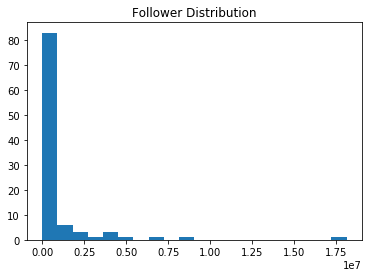

In [108]:
# Plot # of Followers
plt.hist(eda_frame['followers'], bins = 20)
plt.title('Follower Distribution')

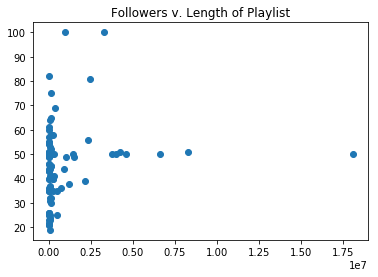

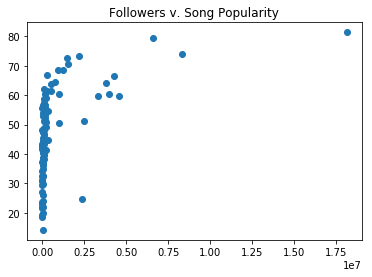

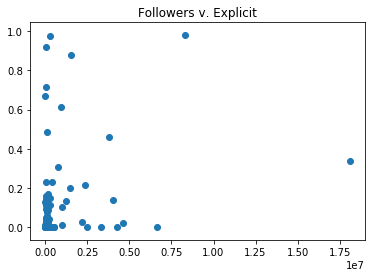

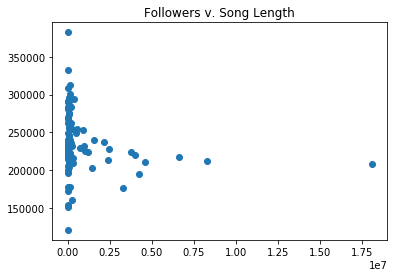

In [112]:
# Plot Predictors v. Response
plt.figure()
plt.scatter(eda_frame['followers'], eda_frame['num_songs'])
plt.title('Followers v. Length of Playlist')

plt.figure()
plt.scatter(eda_frame['followers'], eda_frame['av_song_pop'])
plt.title('Followers v. Song Popularity')

plt.figure()
plt.scatter(eda_frame['followers'], eda_frame['pct_explicit'])
plt.title('Followers v. Explicit')

plt.figure()
plt.scatter(eda_frame['followers'], eda_frame['avg_dur'])
plt.title('Followers v. Song Length')

In [120]:
# Basic Linear Regression
y_train = eda_frame['followers']
x_train = eda_frame[['num_songs','av_song_pop','pct_explicit','avg_dur']]
regress = sm.OLS(y_train.astype(float),x_train.astype(float))
results = regress.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     13.60
Date:                Sat, 25 Nov 2017   Prob (F-statistic):           8.00e-09
Time:                        15:19:49   Log-Likelihood:                -1586.1
No. Observations:                 100   AIC:                             3180.
Df Residuals:                      96   BIC:                             3191.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
num_songs     1.954e+04   1.18e+04      1.657      0.101   -3871.470     4.3e+04
av_song_pop   6.036e+04   1.26e+04      4.810      0.000    3.55e+04    8.53e+04
pct_explicit  8.929e+05   9.37e+05      0.953      0.343   -9.68e+05    2.75e+06
avg_dur        -12.6152      2.861     -4.409      0.000     -18.295      -6.935
==============================================================================
Omnibus:                      141.621   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5401.493
Skew:                           4.953   Prob(JB):                         0.00
Kurtosis:                      37.615   Cond. No.                     1.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""